In [1]:
import eeg_decoder
import numpy as np
from collections import OrderedDict
%load_ext autoreload
%autoreload 2

In [4]:
experiment_name = 'C01c'
data_dir = f'./data/{experiment_name}'
exp = eeg_decoder.Experiment(experiment_name,data_dir,dev=False,trim_timepoints=[-200,1000])

In [117]:
time_window = 50
time_step = 50
trial_bin_size = 10
n_splits = 100
group_dict = OrderedDict([('1',[1]),('2',[2])])
wrangl = eeg_decoder.Wrangler(exp.info['times'],time_window,time_step,trial_bin_size,n_splits,group_dict)
clfr = eeg_decoder.Classification(wrangl,exp.nsub)

In [118]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    try:
        beh = exp.load_behavior(isub)
    except:
        print(f'skipped {isub}')
    xdata,ydata = wrangl.group_labels(xdata,ydata)
    for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_split_data(xdata,ydata):

        X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test)
        y_test_shuffle = np.random.permutation(y_test)

        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)


0
1
skipped 1
2
3
skipped 3
4
5
skipped 5
6
7
8
9
skipped 9
10
skipped 10
11
skipped 11
12
skipped 12


In [146]:
interp = eeg_decoder.Interpreter(clfr, subtitle='1Hv1L') 
interpbad = eeg_decoder.Interpreter(clfr, subtitle='1Hv1L') 
# interp.save_results()

In [147]:
interpbad.acc = interp.acc[[1,3,5,9,10,11,12]]
interp.acc = interp.acc[[0,2,4,6,7,8]]

In [141]:
interp.acc = interp.acc[:,:,:100]
interp.acc_shuff = interp.acc_shuff[:,:,:100]

No handles with labels found to put in legend.


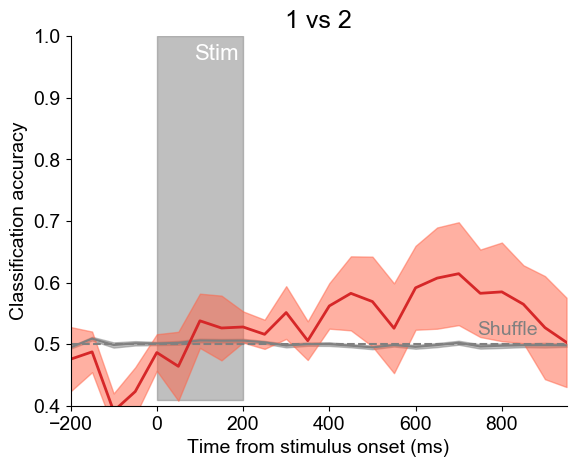

Mean delay accuracy: 0.5591055555555556
Mean delay S.D.: 0.035037182189817564


In [148]:
interp.plot_acc(significance_testing=False,savefig=False,ylim=[.40,1],chance_text_y=.23, title='1 vs 2',stim_time=[0,200])

No handles with labels found to put in legend.


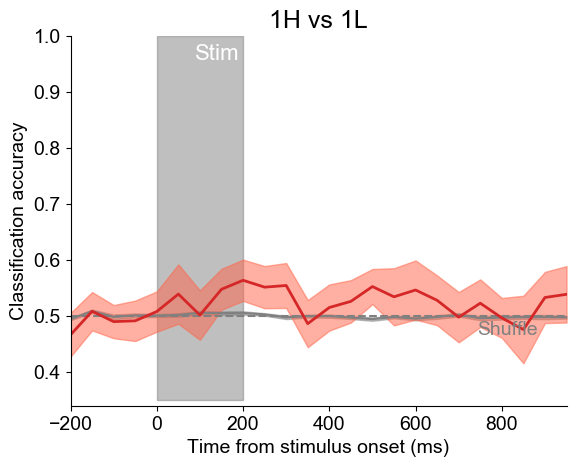

Mean delay accuracy: 0.5242047619047618
Mean delay S.D.: 0.0240572993246052


In [149]:
interpbad.plot_acc(significance_testing=False,savefig=False,ylim=[.34,1],chance_text_y=.23, title='1H vs 1L',stim_time=[0,200])

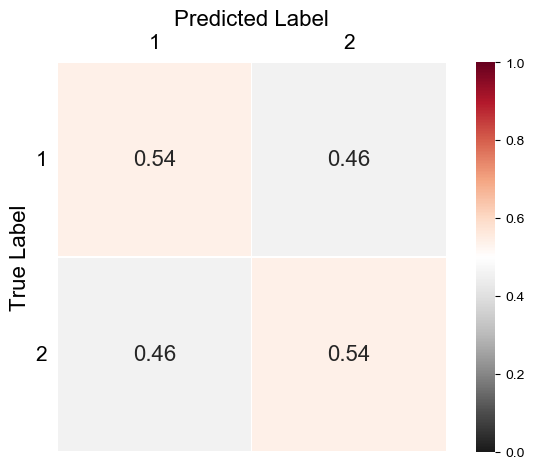

In [126]:
interp.plot_confusion_matrix()

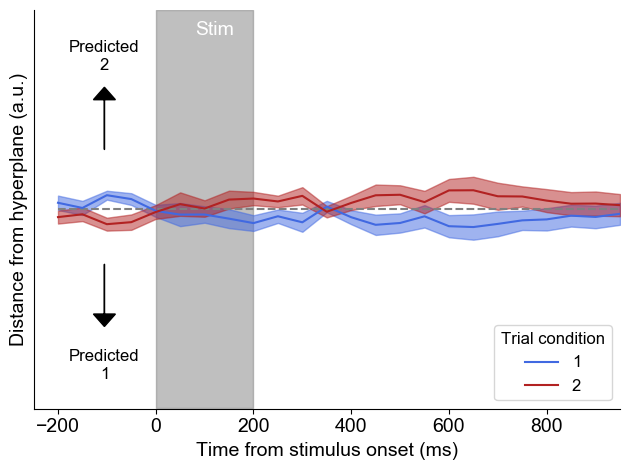

In [127]:
interp.plot_hyperplane(stim_time=[0,200], ylim=[-4,4])